# Programming Basics

### A introductory session for programming based data analysis 

##### This session is designed for supporting the technical components of the course ***Planning Sustainable Cities (2021-1B)***, Department of Urban and Regional Planning and Geo-Information Management, Faculty Geo-Information Science and Earth Observation, University of Twente, Netherlands. Should you find the details of the course at https://canvas.utwente.nl/courses/8456.

##### Dr. Jiong (Jon) Wang,  j.wang-4@utwente.nl


## Foreword
-------------------
One of the most important skills in urban planning and management is **problem solving**. **Problem solving** is the ability to formulate problems and find solutions. For example, to analyze sustainable urban development, you may want to formulate one of the problems as *“How to quantify urban sustainability?”*, and your solutions include *find relevant indicators and combine them reasonably*. It turns out that learning to program is the best way to practice your problem-solving skills. Although there are many tools and software products can support processing indicators and multi-criteria analysis, programming allows you to handle your data and methodology with the greatest flexibility, where you benefit from your creativity. **If you did NOT but would like to know how to start programming, then this page for you.**

Obviously, it is impossible to cover every aspect of programming within a session designed for only one day. But it *is possible* to introduce you some of the basic elements that computer scientists are working with every day. Hence, you will be able to think like a computer scientist, and build sophisticated programs based upon your knowledge about these basic elements. The good news is that, you will get yourself familiar with different data types and see how programs can handle the data flexibly, you will even be able to define simple functions to automatically complete tasks for you, and apply your own functions to real spatial datasets!

To ensure that you can immediately benefit from those largest programming communities, we will start to learn programming by using *Python*, one of the most popular high level programming language today. While using *python*, you need to keep in mind that your purpose is to capture the feeling about programming, instead of just learning *Python*. In the following content, we will walk through some of the basic elements and features that lead you to define your own functions. You will apply the learnt skills to accomplish two challenges. Specifically, you will see:

- Warming up: First program
- 0. Values, variables and naming conventions
- 1. Expressions
- 2. Functions
- 3. Conditionals
- 4. Iteration
- 5. Extended data types
- 6. Reading and writing files
- 7. Visualization
- 8. Challenge 1: working with basic data statistics on point datasets
- 9. Challenge 2: working with regression on raster datasets
- 10. Challenge 3: working with classification on raster datasets

There can be quite a steep learning curve while you walk through the content, so please alway keep in mind that it is very impornt and efficient to get hands on experience while learning programming. DO NOT just sit back and read the codes, DO modify and rewrite, and check the difference.

##### Credit
-------------------
You're very welcome to use the content of this page for teaching and learning. Credit to this work can be given as:
~~~
J. Wang, Programming Basics: A introductory session for programming based data analysis (2020), GitHub repository,
https://github.com/wonjohn/Bayes_for_Regression
~~~

Apart from the two **Challenges**, the contents on this page is largely based upon Allen Downey's book:
~~~
Downey, A.B., Brooks Jr, F.P., Peek, J., Todino, G., Strang, J., Robbins, A., Lamb, L., Hannah, E., Joy, W., Horton, M. and Cameron, D., 2012. Think Python 2e. Green Tea Press.
~~~
which is publicly accessible as an open material at: http://greenteapress.com/thinkpython2/thinkpython2.pdf.

Part of the data used in the **Challenges** is from research projects funded by:
~~~
The Global Geo Health Data Centre (Utrecht University) and the Startimpulsprogramma Meten en Detecteren van Gezond Gedrag (Dutch Science Foundation).
~~~

## First program
##### This is a short program which would help you to look at vegetation cover around Enschede, The Netherlands.
##### The program will load Landsat 8 imagery data to derive the Normalized Difference Vegetation Index for you.
##### Could you please try to run each of sections, and interpret what is going on?

In [11]:
# Import necessary modules

import matplotlib.pyplot as plt
import numpy as np
#% pip install geopandas
import geopandas as gpd
#% pip install rasterio
import rasterio  # For more, please refer to "https://rasterio.readthedocs.io/en/latest/topics/reading.html"
from rasterio.plot import show
from sklearn import cluster

In [ ]:
# Before reading the data we need to first clone the data on Github to our Colab workspace
!git clone https://github.com/jonwangio/Programming-Basics

In [ ]:
%matplotlib inline  # We need to inform this notebook to plot figures in lines, you can ignore this code

In [12]:
# Read files

b5_file_location = 'Programming-Basics/data/20200521_B5.TIF'  #'uu_ml/data/b5_2015.TIF'
b5 = rasterio.open(b5_file_location, nodata=0)

b4_file_location = 'Programming-Basics/data/20200521_B4.TIF'
b4 = rasterio.open(b4_file_location, nodata=0)

In [79]:
# File structure and metadata

# type(b5)
# b5.name
print('The coordinate system of the file is: ' + str(b5.crs))
print('The number of band in the file is: ' + str(b5.count))
print('The spatial extent is bounded by: ' + str(b5.bounds))

The coordinate system of the file is: EPSG:32632
The number of band in the file is: 1
The spatial extent is bounded by: BoundingBox(left=217485.0, bottom=5606685.0, right=459615.0, top=5851515.0)


The size of b5 imagery data is (8161, 8071)


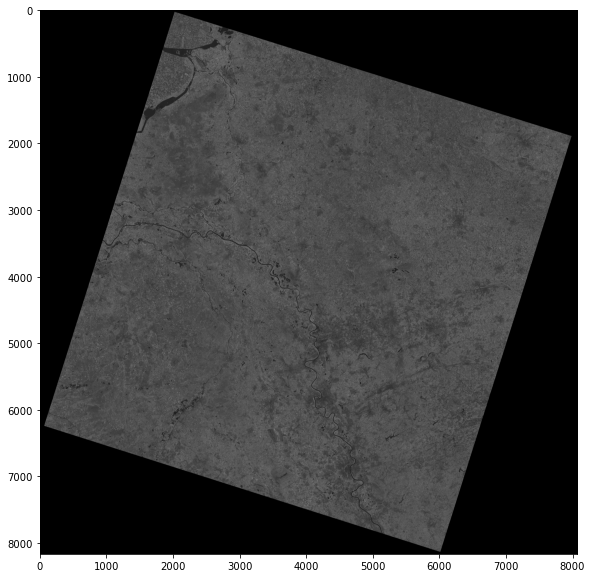

In [80]:
# Layer extraction and visualization

b5_layers = b5.read(1)
b4_layers = b4.read(1)

print('The size of b5 imagery data is ' + str(b5_layers.shape))

# Visualize input files
%matplotlib inline

plt.figure(figsize = (10,10))
plt.imshow(b5_layers, cmap='gray')

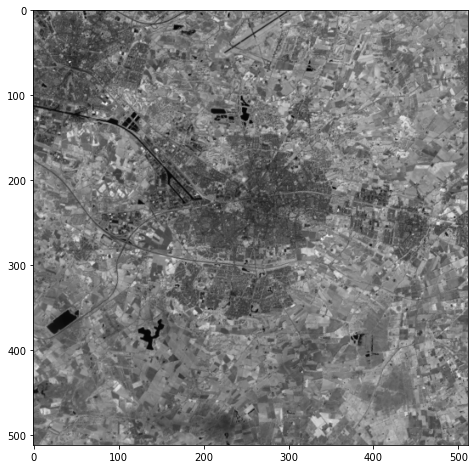

In [82]:
# Subset from the original image and visualize

# Windown size (in pixels) for croping a subset
xsize, ysize = 512, 512

# Generate window location by fixing upper-left corner around Enschede
xoff, yoff = 4350, 1900

# Create a Window and calculate the transform from the source dataset    
window = rasterio.windows.Window(xoff, yoff, xsize, ysize)
#transform_b5 = b5.window_transform(window)  # For band 5

window = rasterio.windows.Window(xoff, yoff, xsize, ysize)
#transform_b4 = b4.window_transform(window)  # For band 4

# Create a new cropped raster to write to
#profile_b5 = b5.profile  # For band 5
#profile_b5.update({
#    'height': xsize,
#    'width': ysize,
#    'transform': transform_b5})

#profile_b4 = b4.profile  # For band 4
#profile_b4.update({
#    'height': xsize,
#    'width': ysize,
#    'transform': transform_b4})

b5_crop = b5.read(window=window)  # Crop band 5
b4_crop = b4.read(window=window)  # Crop band 4

plt.figure(figsize = (8,8))
plt.imshow(b5_crop[0], cmap='gray')

[(0.0, 255.0), (-0.5, 1.0), None]

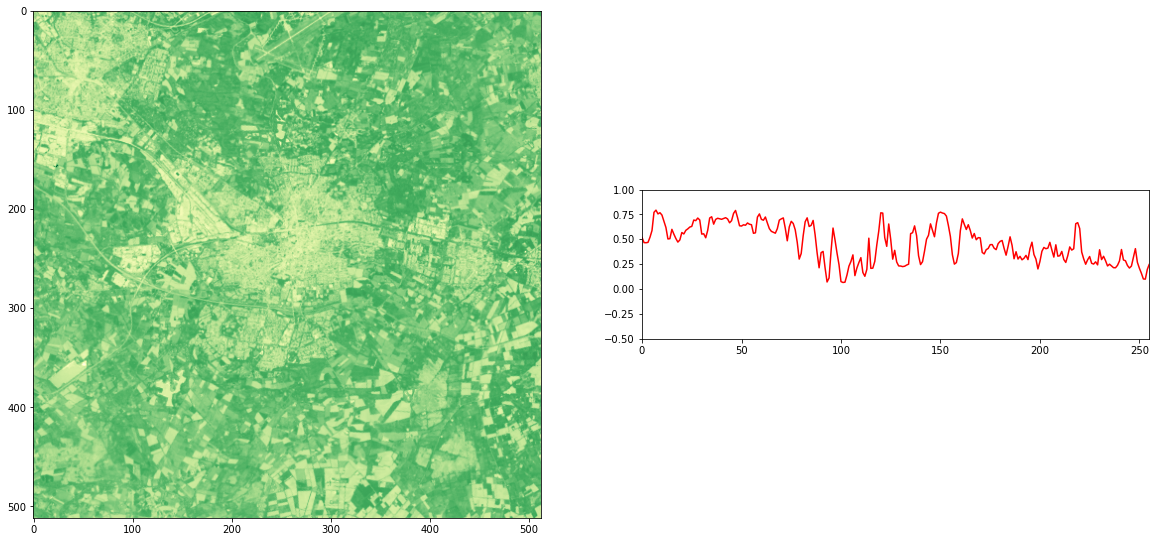

In [83]:
# Normalized difference vegetation index and visualization

# Apply equation: NDVI = (NIR-RED)/(NIR+RED)
ndvi = ((b5_crop[0]*0.00003-0.2) - (b4_crop[0]*0.00003-0.2))/((b5_crop[0]*0.00003-0.2) + (b4_crop[0]*0.00003-0.2))

# Also traverse across the study area for a profile of the NDVI
ndvi_profile = ndvi[256,:]

fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].imshow(ndvi, cmap='YlGn')
axs[1].plot(ndvi_profile,'r-')
axs[1].set(xlim=[0, 255], ylim=[-0.5, 1], aspect=50)

In [68]:
# Take a look at some sample values of the NDVI profile

print(ndvi_profile[0:10])

[0.51813026 0.46660439 0.46545075 0.46910612 0.52130037 0.58849758
 0.77114979 0.79315244 0.7551806  0.76737186]


In [69]:
# Further examination of the profile values

m = min(ndvi_profile)
l = len(ndvi_profile)

In [70]:
# Does the following printed information make sense to you?

print(m)
print(type(m))
print(l)
print(type(l))

0.06589780340655314
<class 'numpy.float64'>
512
<class 'int'>


In [75]:
# And what is this single line of code doing for you?

ndvi_profile[512]

IndexError: index 512 is out of bounds for axis 0 with size 512

## 0. Values, variables and naming conventions
##### Variables are used to store values. And values are of different data types. It is your decision to choose the names for variables. But choosing name is not entirely arbitrary. There are many keywords that Python used to refer to important parameters, functions, and actions.

In [94]:
s = 'Greetings'
m = 0.3
l = 9

print(type(s))
print(type(m))
print(type(l))

<class 'str'>
<class 'float'>
<class 'int'>


In [5]:
# You can NOT use keywords as a name of your variable.

lambda = 10.5

SyntaxError: invalid syntax (<ipython-input-5-6a7081de491c>, line 3)

In [86]:
# These variable names are OK and meaningful, we are using them to store some NDVI values from the NDVI profile we saw above.
# When assign the values, we also rely on indexing.

ndvi1 = ndvi_profile[10]
ndvi2 = ndvi_profile[11]

# Also, let's print them out
print(ndvi1, ndvi2)

0.743803831956407 0.6823008192460955


## 1. Expressions
##### An expression can be a value, variable or combination of both by some operators.

In [87]:
(ndvi1 + ndvi2)/2  # An expression that makes computation.

0.7130523256012513

In [88]:
average = (ndvi1 + ndvi2)/2  # An expression that assigns some computed value to a variable
print(average)

0.7130523256012513


## 2. Functions
##### A function is a named sequence of actions, such as computations. When you define a function, you specify the name and the sequence of actions. Later, you can “call” the function by name.

In [89]:
min(ndvi_profile) # Built-in functions for math operations

0.06589780340655314

In [96]:
type(ndvi_profile)  # Built-in functions for querying data type

numpy.ndarray

In [98]:
int(ndvi1)  # Built-in functions for converting data type

0

In [100]:
# It is almost impossible to accomplish your work by only using internal functions.
# You will also depend on other powerful functions that you have to import before using them.
# Usually, you import modules containing many functions and possibly also useful variables/parameters.

import math # Module containing several functions and variables

print(math)

<module 'math' (built-in)>


In [101]:
import numpy as np # A popular module for working with multi-dimensional arrays

type(np)

module

In [102]:
# To call the functions or variables contained in a module, you need a 'period' notation, which looks like a dot/point.

degrees = 45
radians = degrees/360.0 * 2 * math.pi  # Convert degrees to radians
math.sin(radians)

0.7071067811865476

In [103]:
# How about to define your own functions?
# Start with the keyword 'def'.
# Pay attention to the indention!!

def printSin(rad):
    deg = rad/(2 * math.pi) * 360.0
    print(deg)

In [104]:
type(printSin)

function

In [105]:
printSin(3.14)

179.90874767107852


In [106]:
# A function with a returned value

def printSin(rad):
    deg = rad/(2 * math.pi) * 360.0
    print(deg)
    
    return deg

In [107]:
degrees = printSin(3.0)

171.88733853924697


In [108]:
# Parameters within your functions are local.

print(deg)

NameError: name 'deg' is not defined

##### Exercise

In [99]:
# Define a simple function that compute the average of two values, and call the function.


'''
# Answers and hints
def avg(value1, value2):
    # Your code here...
    print(average)
    
    return
'''

## 3. Conditionals
##### Executes your code depending on the state of the program.

In [111]:
# The most common conditional statement starts with 'if'.
# Conditional statements come along with boolean and logical operations.

ndvi1 = ndvi_profile[10]

if ndvi1 < -1.0 or ndvi1 > 1.0:  # Logical and Boolean operations
    print('NDVI value should be at interval of [-1, 1]')  # Pay attention to the indention

In [28]:
# A sample function defined for computing average NDVI after checking the validity of the inputs.

def avg(value1, value2):
    if value1 < -1.0 or value1 > 1.0 or value2 < -1.0 or value2 > 1.0:  # Logical and Boolean operations
        print('NDVI value should be at interval of [-1, 1]')
    else:
        average = (value1 + value2)/2
        print(average)

In [29]:
print(avg)

<function avg at 0x0000028377382B70>


In [30]:
avg(0.5,0.8)

0.65


## 4. Iteration
##### You may need to do the same operation repeatedly, there are several ways to help you to run actions and functions recursively in your program. We are introducing one of the most frequently adopted 'for' loop in this section.

In [119]:
data = ndvi_profile[:10]  # An array of values from a subset of the NDVI profile
data[3] = 1.33
data[6] = -1.08

In [120]:
# Check a series of NDVI values and print the invalid entries.

for value in data:
    if value < -1.0 or value > 1.0 or value < -1.0 or value > 1.0:  # If speed == 0
        print(value)
        print('NDVI value should be at interval of [-1, 1]')

1.33
NDVI value should be at interval of [-1, 1]
-1.08
NDVI value should be at interval of [-1, 1]


##### Exercise

In [121]:
# Try to loop over the values in the data and print the positive NDVI values


'''
# Answers and hints
for value in data:
    # Your code here:
        # print()
'''

'\n# Answers and hints\nfor value in data:\n    # Your code here:\n        # print()\n'

## 5. Extended data types
##### Different data types handle numbers and values in different ways. Some data types can be more efficient for data operation and analysis.

In [133]:
# So far, we have already see some data types.

m = -0.9
l = 9
s = 'Greetings'
data = ndvi_profile[:10]
data2 = [0.1, -0.6, 1.02, 0.7, -1.3, 0.5, -0.1, -0.9, 0.4]

print(type(m))
print(type(l))
print(type(s))
print(type(data))
print(type(data2))

<class 'float'>
<class 'int'>
<class 'str'>
<class 'numpy.ndarray'>
<class 'list'>


In [124]:
# For strings, you can query and slice the data.

s[0]
#s[0:3]
#len(s)
#s.find('t')

'G'

In [125]:
# For lists, you can also query and slice.

data[3]

1.33

In [126]:
# You also have method for list operation.
data.sort()
print(data)

[-1.08        0.46545075  0.46660439  0.51813026  0.52130037  0.58849758
  0.7551806   0.76737186  0.79315244  1.33      ]


In [127]:
# Lists are not only for numerical numbers.

names = ['file0', 'file1', 'file2', 'file3', 'file4']

In [128]:
names[2]  # And you can again query.

'file2'

In [134]:
# One of the most powerful way to store values and information is to use the data type called arrays.
# In Python community, there is a Numpy module providing several ways to store and operate with arrays.

# First you have to import.
import numpy as np

data_array = np.array(data2)  # You can use Numpy functions to convert the list of your value into Numpy array.

print(data_array)
#type(data_array)

[ 0.1  -0.6   1.02  0.7  -1.3   0.5  -0.1  -0.9   0.4 ]


In [135]:
# You can do many things to your Numpy array. For instance, check the shape.

data_array.shape

(9,)

In [136]:
# Even simple statistics.

np.mean(data_array)
#np.min(data_array)
#np.max(data_array)
#np.median(data_array)
#np.std(data_array)
#np.sum(data_array)

-0.020000000000000004

In [137]:
# Query and operation: index/slice, extract, replace

data_array[1:4]  # Index and slice

ind = np.where(data_array > 0)  # Query and extract
print(ind)

data_array[ind]

data_array[8] = 1.05  # Replace
print(data_array)

(array([0, 2, 3, 5, 8], dtype=int64),)
[ 0.1  -0.6   1.02  0.7  -1.3   0.5  -0.1  -0.9   1.05]


In [138]:
# Convert into interval [0, 1] ?

# Try to figure out why the following computation can achieve the purpose...
(data_array-np.min(data_array))/(np.max(data_array)-np.min(data_array))

array([0.59574468, 0.29787234, 0.98723404, 0.85106383, 0.        ,
       0.76595745, 0.5106383 , 0.17021277, 1.        ])

##### Exercise

In [139]:
# Multidimensional array

some_matrix = np.random.rand(5,4)

print(some_matrix)

[[0.19450289 0.04909689 0.66587144 0.08999131]
 [0.0982283  0.49287207 0.5257308  0.93622102]
 [0.47992577 0.667689   0.18300426 0.13027955]
 [0.76156706 0.0517041  0.26655156 0.40126188]
 [0.70070482 0.65555758 0.21070784 0.79907967]]


In [140]:
# Make query for specific row and column
# Extract specific row or column

'''
# Answers and hints
# Operations over a row or column
np.max(some_matrix[:,0])
'''

'\n# Answers and hints\n# Operations over a row or column\nnp.max(some_matrix[:,0])\n'

## 6. Reading and writing files
##### You won't see the power of programming until working with real datasets. In Python, you have many functions to load source data in different formats, after which you can start to process and analyze your data. Although it is impossible to cover all the situations, you can still have a feeling of how does it look like working with external datasets.

In [141]:
# Many times, we will encounter and work with matrices. Especially 2-dimensional matrix.
# For instance, we can have several rows of data samples, with different columns of indicators.
# Or, in GIS, any data is represented as tables...These are all 2-dimensional matrix.
# Luckily, Numpy provides us the greatest flexibility to handle matrices in the form of arrays.

import numpy as np  # Import module

# Before reading the data we need to first clone the data on Github to our Colab workspace
!git clone https://github.com/jonwangio/Programming-Basics

'git' is not recognized as an internal or external command,
operable program or batch file.


In [143]:
my_data = np.genfromtxt('Programming-Basics/data/veg_t.csv', delimiter=',')  # Read data of temperature and vegetation
print(my_data)  # Print data, and what do you see?

[[       nan        nan]
 [ 0.506782  18.5354546]
 [ 0.52215   19.9666666]
 ...
 [ 0.613     21.88     ]
 [ 0.614471  -0.93     ]
 [ 0.549497  12.2455556]]


In [144]:
my_data = my_data[1:,:]  # Slice table to only keep the values
print(my_data)

[[ 0.506782  18.5354546]
 [ 0.52215   19.9666666]
 [ 0.682284  22.45     ]
 ...
 [ 0.613     21.88     ]
 [ 0.614471  -0.93     ]
 [ 0.549497  12.2455556]]


In [145]:
# Obtain some basic statistics

print(np.mean(my_data[:,0]))
print(np.min(my_data[:,0]))
print(np.max(my_data[:,0]))
print(np.std(my_data[:,0]))

0.5556653380035026
0.030735
0.781723
0.09282027357257225


##### Exercise

In [26]:
# Try to make a simple classification of the NDVI values, where 0 means NDVI < 0.5, and 1 means NDVI > 0.5.
# You can start to extract the column wth NDVI values, and loop over the values to convert the values into 0 and 1.

'''
# Answers and hints
ndvi = my_data[ ]  # Fill in the blanks

ndvi_class = []  # An empty list to store the classified values
for values in ndvi:
    your code here
    returen None

Or, ndvi_class = ndvi >   # Try to figure out how this works
ndvi_class = np.uint()

print()  # Print the results
'''

## 7. Visualization
##### Finally, you don't want to miss the chance to see how actually the data looks like. Visualization is very important at any stage of data analysis. You can take advantage of your visual power to see if the data is intuitively understandable before making any processing, or to check if the results make sense after all your data analysis.

In [23]:
%matplotlib inline  # We need to inform this notebook to plot figures in lines, you can ignore this code

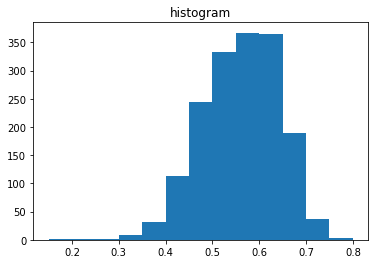

In [146]:
from matplotlib import pyplot as plt  # Import module for plotting and visualization

my_bin = list(np.arange(start=0.15,stop=0.85,step=0.05))
plt.hist(my_data[:,0], bins = my_bin) 
plt.title("histogram") 
plt.show()

##### Exercise

In [ ]:
# Try to visualize same information (histogram and scatters) for the temperature data.

# Your code here:

'''
my_bin = list(np.arange(start= ,stop= ,step= ))
plt.hist(my_data[], bins = my_bin) 
plt.title("histogram") 
plt.show()
'''

In [ ]:
# Try to see the scatterplot between vegetation and temperature

'''
plt.plot(my_data[ ], my_data[ ],'o')
plt.title('scatter of vegetation and temperature')
plt.show()
'''

## 8. Challenge 1: Working with basic statistics on air pollution point data
##### In this challenge, you are going to work with GIS point dataset, where air pollutant NO2 and some potential predictors (indicators) are provided. While acquiring point measurement of NO2 at each station, indicators such as road length and population size within a buffer of the station is also obtained. Specifically you will have weekday daytime and nighttime NO2 point measurements at several stations (point). Road length and population size around each station (point) is indicated with the buffer size. For instance, 'populaiton_3000m' means population size within the 3000m buffer zone around each stations (point).
##### You will work with famous 'pandas' module to handle table based dataset. You will also try to learn how to study the functionality of the module by exploring online open source documentation.

In [149]:
# The first thing you need to do is to import the 'pandas' module

import pandas as pd

In [151]:
# You can be able to read *.csv based GIS point dataset by using 'pandas'

data_all = pd.read_csv('Programming-Basics/data/no2.csv')
#print(data_no2)
data_all.head(5)  # What does this mean?

,Point,Longitude,Latitude,weekday_daytime_no2,weekday_nighttime_no2,population_1000m,population_3000m,population_5000m,roadlength_1000m,roadlength_3000m,roadlength_5000m
0,1,3.749458,51.295278,15.486447,16.807046,440.064819,3312.588867,8206.84375,0.00000,28314.40625,60863.47656
1,2,3.916947,51.635556,14.697327,16.898273,492.458710,3886.029297,5170.12207,5352.03125,62689.73828,75216.85156
2,3,4.121389,51.978056,28.577064,30.600098,3102.089111,23252.750000,61342.87891,12614.07422,38824.15234,77248.41406
3,4,4.227778,51.931944,31.335268,33.090708,6142.983398,36911.640630,79492.71094,13942.57422,82291.88281,164851.23440
4,5,4.289172,52.078056,23.677740,26.016235,19552.472660,152638.750000,322745.00000,60375.49609,440915.18750,903282.81250


In [152]:
# Extract the daytime NO2 data as a column
# Try to figure out what does the data type mean?

daytime_no2 = data_all['weekday_daytime_no2']
type(daytime_no2)

pandas.core.series.Series

In [ ]:
# Please print it out to see how it looks like.

#print(daytime_no2)

In [55]:
# You can further extract the values of the pandas column as Numpy array. Handy!

no2_val = daytime_no2.values
type(no2_val)

# Please also inspect the data range by looking into the min, max and mean

'''
np.min()
np.max()
np.mean()
'''

numpy.ndarray

In [ ]:
# Now try to inspect some basic statistics of your NO2 data.
# Please recall from section 7 how the histogram has been created.

'''
# Answers and hints

my_bin = 
plt.hist( , bins = my_bin) 
plt.title("histogram") 
plt.show()
'''

In [ ]:
# Repeat the histogram inspection with some nighttime NO2 data

'''
# Answers and hints

# Start with extracting the nighttime NO2 from the original dataset
nighttime_no2 = data_all[' ']

# And create histogram
my_bin = 
plt.hist( , bins = my_bin) 
plt.title("histogram") 
plt.show()
'''

In [155]:
# In your previous lectures about statistical analysis, you also saw boxplots
# Please try to create boxplots for both daytime and nighttime NO2 data and visually compare their distributions.
 
'''
daytime_no2 = data_all[' ']
nighttime_no2 = data_all[' ']

data = [daytime_no2, nighttime_no2]
 
# Creating figures and axes instance to hold the data
fig = plt.figure(figsize =(7,7))
ax = fig.add_axes([0, 0, 1, 1])
 
# Plot
bp = ax.boxplot(data)
plt.show()
'''

"\ndaytime_no2 = data_all[' ']\nnighttime_no2 = data_all[' ']\n\ndata = [daytime_no2, nighttime_no2]\n \n# Creating figures and axes instance to hold the data\nfig = plt.figure(figsize =(7,7))\nax = fig.add_axes([0, 0, 1, 1])\n \n# Plot\nbp = ax.boxplot(data)\nplt.show()\n"

In [45]:
# Please extract another column about either population or roads and inspect the information

'''
# Answers and hints
population_3000 = data_all['population_3000m']
type()
'''

# Assign the values to variable named "pop_val"
'''
# Answers and hints
pop_val = population_3000.values
'''

'\n# Answers\npop_val = population_3000.values\n'

In [46]:
# Try to visualize the scatter plots of NO2 and population


'''
# Answers and hints
plt.plot(no2_val, pop_val,'o')
plt.title('scatter of no2-population')
plt.show()
'''

"\n# Answers and hints\nplt.plot(no2_val, pop_val,'o')\nplt.title('scatter of no2-population')\nplt.show()\n"

In [ ]:
# Now, imagine you want to automatically plot the scatter plot of any two columns of data given the names of the columns.
# Please try to define a function, where the input of the function are names of two columns, and the out put is the scatter plot.

In [47]:
# Recall that defining a function starts with the key word "def"

'''
# Answers and hints
def no2_scatter(name1, name2, data):
    series1 = data[name1]
    series2 = data[name2]
    
    val1 = series1.values
    val2 = series2.values
    
    plt.plot(val1, val2,'o')
    plt.title('scatter of'+name1+name2)
    plt.show()
'''

"\n# Answers and hints\ndef no2_scatter(name1, name2, data):\n    series1 = data[name1]\n    series2 = data[name2]\n    \n    val1 = series1.values\n    val2 = series2.values\n    \n    plt.plot(val1, val2,'o')\n    plt.title('scatter of'+name1+name2)\n    plt.show()\n"

In [156]:
# Does your function work? Try to call it.


'''
# Answers and hints
no2_scatter('weekday_daytime_no2', 'roadlength_1000m', data_all)
'''

"\n# Answers and hints\nno2_scatter('weekday_daytime_no2', 'roadlength_1000m', data_all)\n"

## 9. Challenge 2: Working with images and regression tool
##### In this challenge, you will work with remote sensing imagery data, where you will also try to figure out how to conduct regression analysis in Python by yourself! You will have two images in total. The images covers a Chinese city named Wuhan, please open a Google map and try to find out how does the city look like on satellite images. Among the two images, one image about impervious surface fraction, and the other about land surface temperature. You will also learn yourself with 'PIL' module that handles images, including reading, writing and processing. But we only use this module for reading images, and we will use Numpy to investigate the data. To further conduct regression analysis, you are recommended to use 'scipy' or 'sklearn' modules, but not restricted by them. You will try to generate your own functions that can repeatedly help you to accomplish similar workflow.

In [84]:
from PIL import Image  # Use 'from' to import a sub-module from a module
import numpy as np
import matplotlib.pyplot as plt

isf = Image.open('Programming-Basics/data/impervious_surface.tif')  # This is a PIL image object

# Print it out to see what shows up
#print()

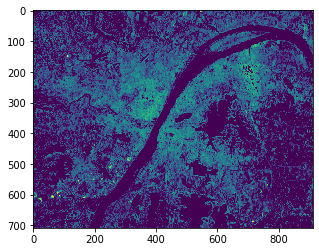

In [85]:
# You can convert the image object to Numpy array for easier operations
isf_array = np.array(isf)

# Use 'matplotlib' to visualize the array as an image
plt.imshow(isf_array)

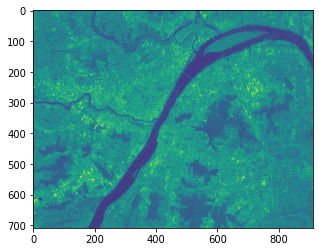

In [86]:
# Use the similar way to visualize the land surface temperature data
t = Image.open('Programming-Basics/data/surface_temperature.tif')  # This is a PIL image object


'''
# Answers and hints
t_array = np.array(t)

# Use 'matplotlib' to visualize the array as an image
plt.imshow(t_array)
'''

In [89]:
# Inspect the shape and statistics of all the image data


'''
# Answers and hints
# For example, the shape of the data
t_array.shape

# Or, the minimum value
#np.min(t_array)

# Others?
#np.max()
#np.std()
'''

(708, 910)

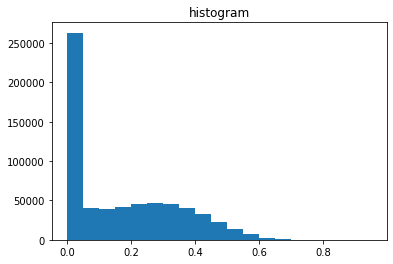

In [90]:
# Try to plot the histogram for both temperature and impervious surface data

# At this moment, the data is still 2-dimensional arrays. In order to plot histogram, you need to convert the 2-dimensional array into one column, such as this:
isf_array_col = np.reshape(isf_array,(-1,1))  # What does this mean? Try to explore Numpy online documents about this function, or print it out.


'''
# Answers and hints
my_bin = list(np.arange(start=0.0,stop=1.0,step=0.05))
plt.hist(isf_array_col, bins = my_bin) 
plt.title("histogram") 
plt.show()
'''

In [91]:
# How about the statistics of the temperature data?

t_array_col = np.reshape(t_array,(-1,1))  # Again, convert the data into one column

# Please write your code here to visualize the histogram for the temperature data.


'''
# Answers and hints
my_bin = # Your code begins
'''

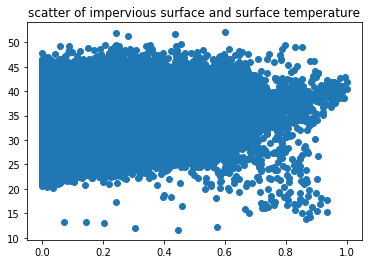

In [102]:
# Now, let's take a look at more statistics between impervious surface and temperature.

# As you may notice, even for small images, there are already a LOT of values, alway over millions of numbers.
# It can be to large for compute regression statistics.
# We can sample some data.
# As you saw, there are many 0 values in the impervious surface data, let's focus on those non-zeros.

# You may want to keep all the non-zeros in the impervious data, and also the corresponding data on temperature image.
# One way to do this is to record the index of the non-zeros on impervious image data, and extract the corresponding ones on temperature data.

# Recall how we extract index of wanted values from Numpy arrays...

ind = np.where(isf_array_col>0)  # Sample index

isf_array_reg = isf_array_col[ind]  # Sampled data for regression

t_array_reg = t_array_col[ind]

In [ ]:
# There is a 'scipy' module, which is very handy to inspect statistics among datasets, such as regression.

# You need to first import the module and then apply it to our data, for example:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(isf_array_reg, t_array_reg)

# If you print the results, for example, the correlation coefficient, what do you see?
print(r_value)

In [ ]:
# There are many powerful python modules, which can handle the large data volumn problem automatically.
# One of them is the 'sklearn' module, which samples data points for regression analysis.
# Please notice the names of the modules, and learn to explore online documents for details about the modules.

from sklearn import linear_model

'''
# Answers and hints
# Please try to go online and find documentations about sklearn module named "linear_model"
# Implement linear regression analysis by calling the module "linear_model"
'''

In [ ]:
# Does the results makes sense? Well, may be you would also like to plot and visualize how the data appears to be.

# Given two image datasets, please define a function, where you can plot scatter plots along with regression statistics.


'''
# Answers and hints
def scatter_img(img1, img2):
    # your code here
    # ...
    # ...
'''
     
# Try to make a more complete visualization.
# Update the function you have, to plot scatters and regression lines together.

## 10. Challenge 3: Working with unsupervised clustering based classification on imagery data
##### In this challenge, you will again work with remote sensing imagery data, but will deal with the classification problem as opposed to the regression problem. The imagery data you will be using is the same data you saw at the beginning of this lecture, which is the Landsat 8 band 4 and 5 for the city of Enschede. You will be applying a simple unsupervised machine learning algorithm, call the K-means, to the data to visualize how the patterns within the data can be used to classify image pixel values.
##### As this can be a lot more advanced exercise, you are recommended to walk through the codes instead of writing them. But please do spend your time sitting down and understanding how operations work. Similar to Challenge 9, you will have your own functions that can repeatedly help you to accomplish similar workflow.

### Before starting: Clustering basics

You are highly recommended to read this very informative online article [**Unsupervised Learning and Data Clustering**](https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a) to get yourself familiar with the **unsupervised** clustering based classification. 

It is named as **unsupervised** because there is no **label** in the dataset indicating the pattern of classes within the dataset. And the classification results solely depend on how the classification algorithms explore the dataset. For instance, data points adjacent to each other can be treated as from one class. Even for such simple formalization, there can already be many ways to characterize the adjacency. The simplest way is to measure the Euclidean distance between the data points in the feature space and **cluster** the adjacent data points into classes. The **K-means** algorithm can help you to achieve this. The **K_means** is thus used as the starting point of **unsupervised** classification. Apart from the **K-means**, there are also **Gaussian Mixture** models that try to impose multi-modal *Gaussian* distributions upon the data points in the feature space, which also **cluster** the data points into classes according in terms of probability. For your information, these few algorithms including the **K-means** and **Gaussian Mixture** all fall into the **expectation maximization** (**EM**) family of algorithms. So, if you are interested in them, please do explore further background information about the **EM**s. However, it is not possible to cover all of them in this section. 

As mentioned above, you will continue using Remote Sensing imagery dataset that you already familiar with. But to get started, you will first look at some artificially generated data, which I call the dummy dataset. It is always quite advantageous to use dummy dataset. First, you can simulate different situations. And then, you know the nature of the dataset and it will be easy for you to evaluate the performance of algorithms, such as the **K-means**, in capturing that nature. After going through the rationale of the **K-means**, you will work on the real dataset.

##### 10.0 K-means on dummy dataset

##### Here, you will first look at few data points in a dummy dataset in a low dimensional feature space. This will ensure the entire classification/clustering procedure ideal, clean and easy to understand. A 2-dimensional dummy dataset is generated for you. It means that each data point in the dataset is characterized by two values and can be represented in a 2-dimensional feature space, where you will apply your classification algorithms. Here in this session, you will apply the **K-means** in the 2-dimensional feature space.

In [ ]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

In [ ]:
# You are not going to be bothered with too many packages/modules.
# The entire K-means demonstration will only depend on two modules: Numpy and Matplotlib.

import matplotlib.pyplot as plt
import numpy as np

# Create dummy dataset containing 350 2-dimensional data points.
# Try to figure out how does the code work.
points = np.vstack(((np.random.randn(150, 2) * 0.7 + np.array([2, 0])),
                  (np.random.randn(100, 2) * 0.3 + np.array([-0.5, 1.0])),
                  (np.random.randn(100, 2) * 0.5 + np.array([0.0, -1.0]))))

# Visualize the dummy dataset.
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([2, 0]), 0.7/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 1.0]), 0.3/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([0.0, -1.0]), 0.5/2, fill=False, lw=2))
plt.title('Data')
plt.legend()

In [ ]:
# Try to understand the procedure of the K-means: updating the centroid and data clusters.

# During K-means clustering, you need to initialize some random centroids by using existing data points.
# First, you need to identify the number of centroids: k. Here we start with 3. Do also experiment with other numbers.
k = 3

# Then, choose k data points randomly as the initial centroids.
centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]  # And choose the first k data points in the shuffled dataset as initialized centroids.

# You can also plot and visualize the initialization
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# Try to run this section of code for few more times to see the randomization.

In [ ]:
# Clustering: assign each data points to its closest centroid

# First, you need to compute the distance between each point and each centroid.
# Thus, for each of the data points you will have three distances to the three initialized centroids.
distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))

# Now, for each of the data points, find the index of the closest centroid, pleast print it out and see how they look like.
closest_ind = np.argmin(distances, axis=0)

In [ ]:
# Once you have assigned the data points into their closest centroids, you have your first clusters.
# What you need to do is updating the random centroids to the center/mean of the new clusters.

centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])

# You can visualize the updated centroids. Do you see the difference?
plt.figure(figsize=(10,8))
# You can also try to color the data points by their centroid/cluster index
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# You can simply run and re-run this few lines of codes including distance computation and centroids update to see how centroids can be continuously updated.

In [ ]:
# We can also wrap these few lines of code in a 'for loop' to see if how centroids converge in few iterations.

centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]

iterations = 5
for i in range(iterations):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    closest_ind = np.argmin(distances, axis=0)
    centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])
    
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

In [ ]:
# Let's try to wrap-up all the codes into functions

def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [ ]:
# Try to call your function, and inspect how centroids are updated.
centroids = initialize_centroids(points, 3)

fig = plt.figure(figsize=(15,15))
for i in range(9):
    closest_ind = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest_ind, centroids)
    plt.subplot(3, 3, i+1)
    plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

##### 10.1 K-means through existed modules in Sklearn.

##### In fact, today, you don't have to implement the K-means by yourself. The 'sklearn' module has already implemented the K-means for you, and you can directly use the clustering functionality by calling the functions within the module.

In [ ]:
# Let's try the 'sklearn' on our artifical dataset.
# This code will use few modules: pathlib, Numpy, matplotlib, Scipy and sklearn
from sklearn import cluster

kmean_cluster = cluster.KMeans(n_clusters=3)  # This is a function to be fitted to the data
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly contained in the results. For instance, what is the 'kmean_cluster'?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='x', label='training data')
plt.title('Data')
plt.legend()

# Compare the results with those you obtained above.

##### 10.2 The K-means on real Remote Sensing datasets.

##### Now, it's time to try the **K-means** on real world dataset! It is the dataset you saw at the beginning of the lecture including the Landsat 8 band 4 and 5. You will apply the **K-means**, the **unsupervised** algorithm, to explore the hidden patterns of pixels in terms of their values in both bands. You will classify the pixels and see how the spatial patterns resemble the previously computed NDVI patterns -- interesting!!

In [ ]:
# Again, before reading the data we need to first clone the data on Github to our Colab workspace
!git clone https://github.com/jonwangio/Programming-Basics

In [ ]:
# Again, inform the Colab interface to plot figures inline
%matplotlib inline

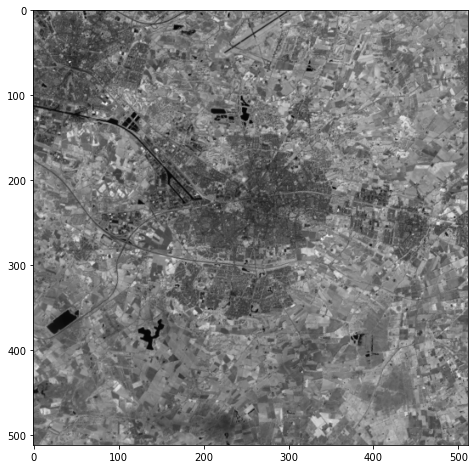

In [163]:
# Read files and visualize the data again

b5_file_location = 'Programming-Basics/data/20200521_B5.TIF'  #'uu_ml/data/b5_2015.TIF'
b5 = rasterio.open(b5_file_location, nodata=0)

b4_file_location = 'Programming-Basics/data/20200521_B4.TIF'
b4 = rasterio.open(b4_file_location, nodata=0)

b5_layers = b5.read(1)
b4_layers = b4.read(1)

# Subset from the original image and visualize

# Windown size (in pixels) for croping a subset
xsize, ysize = 512, 512
# Generate window location by fixing upper-left corner around Enschede
xoff, yoff = 4350, 1900

# Create a Window and calculate the transform from the source dataset    
window = rasterio.windows.Window(xoff, yoff, xsize, ysize)
#transform_b5 = b5.window_transform(window)  # For band 5
#transform_b4 = b4.window_transform(window)  # For band 4

b5_crop = b5.read(window=window)  # Crop band 5
b4_crop = b4.read(window=window)  # Crop band 4

plt.figure(figsize = (8,8))
plt.imshow(b5_crop[0], cmap='gray')

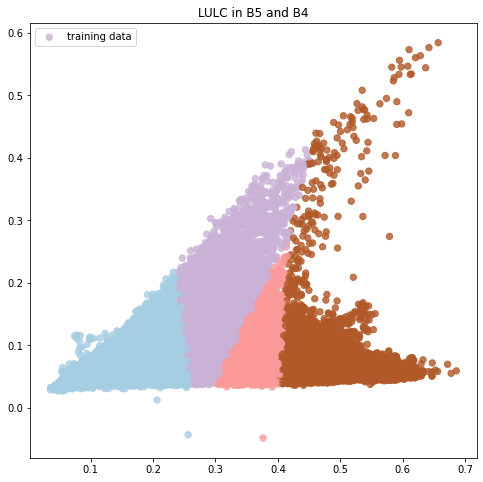

In [177]:
# Let's try the 'sklearn' on this real world dataset.
# This code will use few modules: pathlib, Numpy, matplotlib, Scipy and sklearn
from sklearn import cluster

# Recall that you have to decide the number of clusters!!
# But also keep in mind that it is not always easy to make the decision as you saw in this case with nicely chosen data.
kmean_cluster = cluster.KMeans(n_clusters=4)  # This is a function to be fitted to the data
points = np.c_[b5_crop[0].ravel()*0.00003-0.2, b4_crop[0].ravel()*0.00003-0.2]
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly contained in the results. For instance, how the 'labels' are created and represented?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(8,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B5 and B4')
plt.legend()

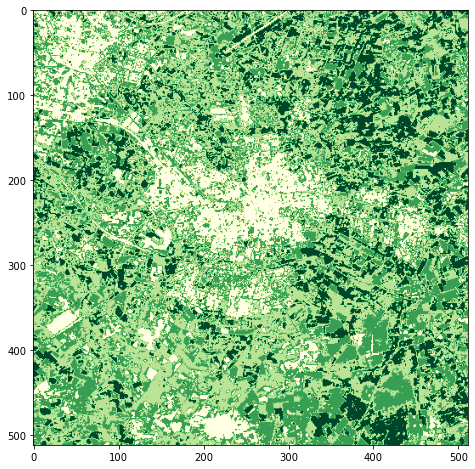

In [178]:
# Visualization for the spatial pattern of the clusters
# Because the predicted labels are still in one column, you need to reshape it back to original image shape
row, col = b5_crop[0].shape  # Get the original dimensions of the image
plt.figure(figsize = (8,8))
plt.imshow(labels.reshape(row, col), cmap='YlGn')

##### Question: How does this clustering result compared to the NDVI map? Does the clustering make sense according to your knowledge about the city?